# 08. 차원 축소

In [1]:
# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)    
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 8.1 차원의 저주     

## 8.2 차원 축소를 위한 접근 방법

### 8.2.1 투영

### 8.2.2 매니폴드 학습

## 8.3 PCA

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

### 8.3.1 분산 보존 

### 8.3.2 주성분

In [19]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

### 8.3.3 d차원으로 투영하기

### 8.3.4 사이킷런 사용하기

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

### 8.3.5 설명된 분산의 비율

In [24]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

### 8.3.6 적절한 차원 수 선택하기

In [38]:
import gzip

with gzip.open("../datasets/MNIST/train-images-idx3-ubyte.gz", "rb") as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 784)
with gzip.open("../datasets/MNIST/train-labels-idx1-ubyte.gz", "rb") as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open("../datasets/MNIST/t10k-images-idx3-ubyte.gz", "rb") as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 784)
with gzip.open("../datasets/MNIST/t10k-labels-idx1-ubyte.gz", "rb") as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)

In [40]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [43]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

### 8.3.7 압축을 위한 PCA

In [44]:
X_reduced.shape

(60000, 154)

In [60]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

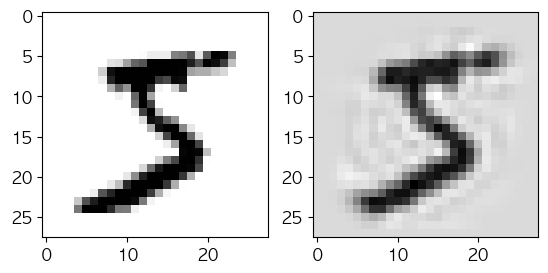

In [69]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(X_train[0].reshape(28, 28), cmap='binary')
axs[1].imshow(X_recovered[0].reshape(28, 28), cmap='binary')